In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
DatasetA = pd.read_csv("D:\STUDIES\ML\Projects\Projects\Data_Science_Playground\my_file.csv", sep=",",encoding='utf-8',skipinitialspace = True)
DatasetA.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [43]:
DatasetB = DatasetA.copy()
print(DatasetB.columns.tolist())
DatasetB['Peak'] = DatasetB['Peak'].str.extract(r'(.*)\[')
DatasetB['All Time Peak'] = DatasetB['All Time Peak'].str.extract(r'(.*)\[')  
DatasetB['Actual\xa0gross'] = DatasetB['Actual\xa0gross'].replace('\D','', regex = True).astype(int)
DatasetB.rename(columns={"Actual\xa0gross": "Actual gross", "Adjusted\xa0gross (in 2022 dollars)": "Adjusted gross"},inplace=True)
del DatasetB['Ref.']
DatasetB['Adjusted gross'] = DatasetB['Adjusted gross'].replace('\D','', regex = True).astype(int)
DatasetB['Average gross'] = DatasetB['Average gross'].replace('\D','', regex = True).astype(int)
DatasetB["Year_Start"] = DatasetB["Year(s)"].apply(lambda x: x[0:4]).astype(int)

DatasetB["Year_End"] = DatasetB["Year(s)"].apply(lambda x: x[-4:]).astype(int)
del DatasetB['Year(s)']
DatasetB['All Time Peak'] = DatasetB['All Time Peak'].fillna(0)
DatasetB['Peak'] = DatasetB['Peak'].fillna(0)

['Rank', 'Peak', 'All Time Peak', 'Actual\xa0gross', 'Adjusted\xa0gross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)', 'Shows', 'Average gross', 'Ref.']


In [44]:
import re
pattern = "(\[[0-9]*[a-z]*\])"
DatasetB["Tour title"] = DatasetB["Tour title"].apply(lambda x: re.sub(pattern, "", str(x)))

In [45]:
DatasetB

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross,Artist,Tour title,Shows,Average gross,Year_Start,Year_End
0,1,0,0,780000000,780000000,Taylor Swift,The Eras Tour †,56,13928571,2023,2024
1,2,0,7,579800000,579800000,Beyoncé,Renaissance World Tour,56,10353571,2023,2023
2,3,1,2,411000000,560622615,Madonna,Sticky & Sweet Tour ‡,85,4835294,2008,2009
3,4,2,10,397300000,454751555,Pink,Beautiful Trauma World Tour,156,2546795,2018,2019
4,5,2,0,345675146,402844849,Taylor Swift,Reputation Stadium Tour,53,6522173,2018,2018
5,6,2,10,305158363,388978496,Madonna,The MDNA Tour,88,3467709,2012,2012
6,7,2,0,280000000,381932682,Celine Dion,Taking Chances World Tour,131,2137405,2008,2009
7,7,0,0,257600000,257600000,Pink,Summer Carnival †,41,6282927,2023,2024
8,9,0,0,256084556,312258401,Beyoncé,The Formation World Tour,49,5226215,2016,2016
9,10,0,0,250400000,309141878,Taylor Swift,The 1989 World Tour,85,2945882,2015,2015


         Artist  Shows  Actual gross
8  Taylor Swift    280    1526075146
6       Madonna    315    1079958363
1       Beyoncé    237    1064984556
7          Pink    339     838900000
5     Lady Gaga    301     397400000
2   Celine Dion    131     280000000
4    Katy Perry    151     204000000
3          Cher    325     200000000
0         Adele    121     167700000


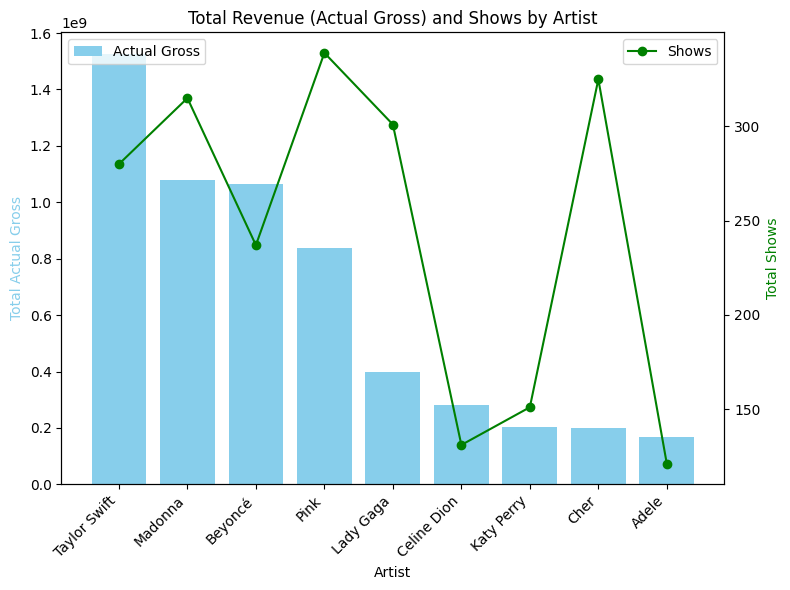

In [46]:
Total_Revenue = DatasetB.groupby("Artist", as_index=False)[["Shows", "Actual gross"]].sum()
Total_Revenue = Total_Revenue.sort_values(by="Actual gross", ascending=False)

print(Total_Revenue)
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(Total_Revenue["Artist"], Total_Revenue["Actual gross"], color="skyblue", label="Actual Gross")
ax2 = ax1.twinx()
ax2.plot(Total_Revenue["Artist"], Total_Revenue["Shows"], color="green", marker="o", label="Shows")

ax1.set_xticks(range(len(Total_Revenue["Artist"])))
ax1.set_xticklabels(Total_Revenue["Artist"], rotation=45, ha="right") 
ax1.set_xlabel("Artist")
ax1.set_ylabel("Total Actual Gross", color="skyblue")
ax2.set_ylabel("Total Shows", color="green")
plt.title("Total Revenue (Actual Gross) and Shows by Artist")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()

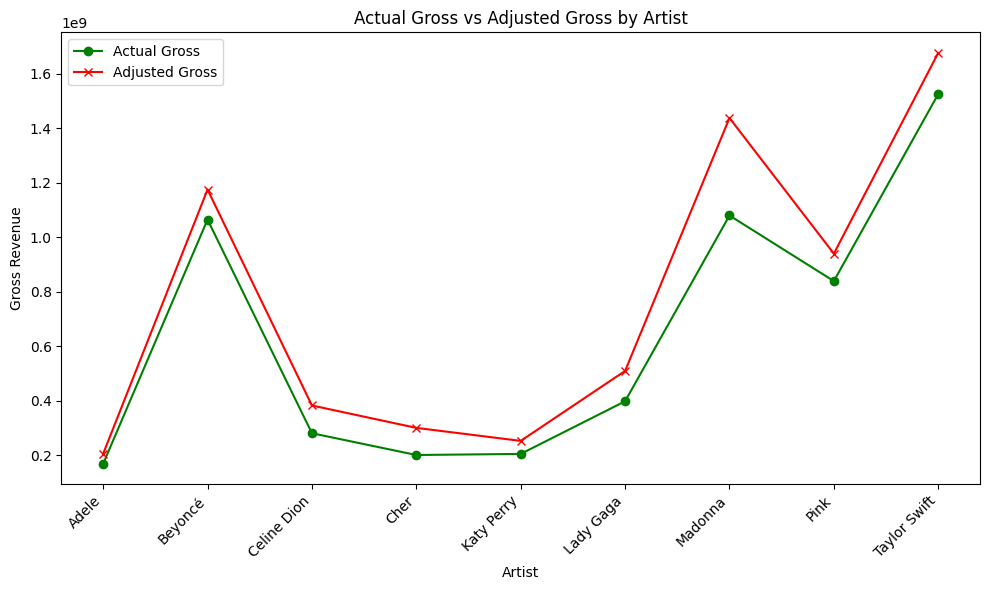

In [47]:
grouped_data = DatasetB.groupby("Artist", as_index=False)[["Actual gross", "Adjusted gross"]].sum()
plt.figure(figsize=(10, 6))
plt.plot(grouped_data["Artist"], grouped_data["Actual gross"], marker="o", label="Actual Gross", color="green")
plt.plot(grouped_data["Artist"], grouped_data["Adjusted gross"], marker="x", label="Adjusted Gross", color="red")
plt.xlabel("Artist")
plt.ylabel("Gross Revenue")
plt.title("Actual Gross vs Adjusted Gross by Artist")
plt.xticks(rotation=45, ha="right") 
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
DatasetB["Year_Start"]=pd.to_datetime(DatasetB.Year_Start, format='%Y')
DatasetB["Year_End"]=pd.to_datetime(DatasetB.Year_End, format='%Y')
DatasetB

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross,Artist,Tour title,Shows,Average gross,Year_Start,Year_End
0,1,0,0,780000000,780000000,Taylor Swift,The Eras Tour †,56,13928571,2023-01-01,2024-01-01
1,2,0,7,579800000,579800000,Beyoncé,Renaissance World Tour,56,10353571,2023-01-01,2023-01-01
2,3,1,2,411000000,560622615,Madonna,Sticky & Sweet Tour ‡,85,4835294,2008-01-01,2009-01-01
3,4,2,10,397300000,454751555,Pink,Beautiful Trauma World Tour,156,2546795,2018-01-01,2019-01-01
4,5,2,0,345675146,402844849,Taylor Swift,Reputation Stadium Tour,53,6522173,2018-01-01,2018-01-01
5,6,2,10,305158363,388978496,Madonna,The MDNA Tour,88,3467709,2012-01-01,2012-01-01
6,7,2,0,280000000,381932682,Celine Dion,Taking Chances World Tour,131,2137405,2008-01-01,2009-01-01
7,7,0,0,257600000,257600000,Pink,Summer Carnival †,41,6282927,2023-01-01,2024-01-01
8,9,0,0,256084556,312258401,Beyoncé,The Formation World Tour,49,5226215,2016-01-01,2016-01-01
9,10,0,0,250400000,309141878,Taylor Swift,The 1989 World Tour,85,2945882,2015-01-01,2015-01-01


          Artist                         Tour title  Duration
0   Taylor Swift                    The Eras Tour †         2
1        Beyoncé             Renaissance World Tour         1
2        Madonna              Sticky & Sweet Tour ‡         2
3           Pink        Beautiful Trauma World Tour         2
4   Taylor Swift            Reputation Stadium Tour         1
5        Madonna                      The MDNA Tour         1
6    Celine Dion          Taking Chances World Tour         2
7           Pink                  Summer Carnival †         2
8        Beyoncé           The Formation World Tour         1
9   Taylor Swift                The 1989 World Tour         1
10       Beyoncé    The Mrs. Carter Show World Tour         2
11     Lady Gaga            The Monster Ball Tour *         3
12    Katy Perry               Prismatic World Tour         2
13          Cher  Living Proof: The Farewell Tour ‡         4
14       Madonna                   Confessions Tour         1
15      

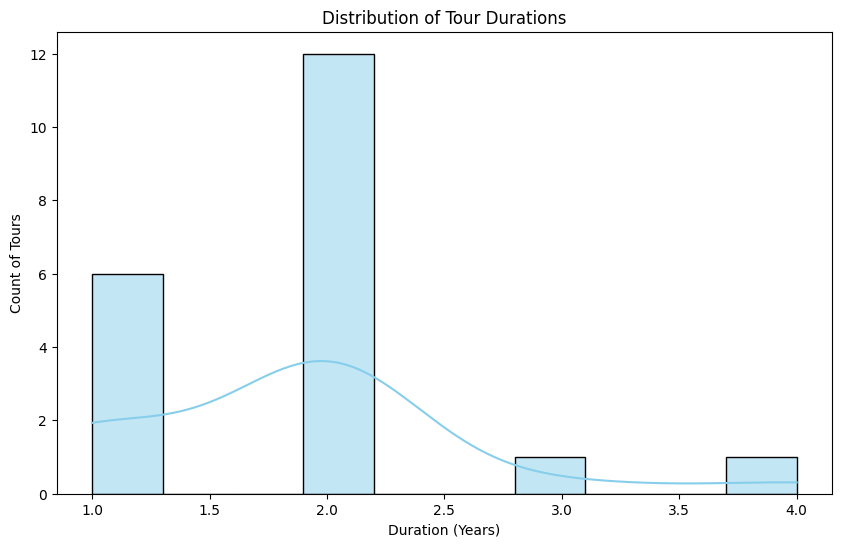

In [48]:
#Duration analysis
DatasetB['Duration'] = DatasetB['Year_End'] - DatasetB['Year_Start'] + 1
print(DatasetB[['Artist', 'Tour title', 'Duration']])

# Plot duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(DatasetB['Duration'], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Tour Durations")
plt.xlabel("Duration (Years)")
plt.ylabel("Count of Tours")
plt.show()


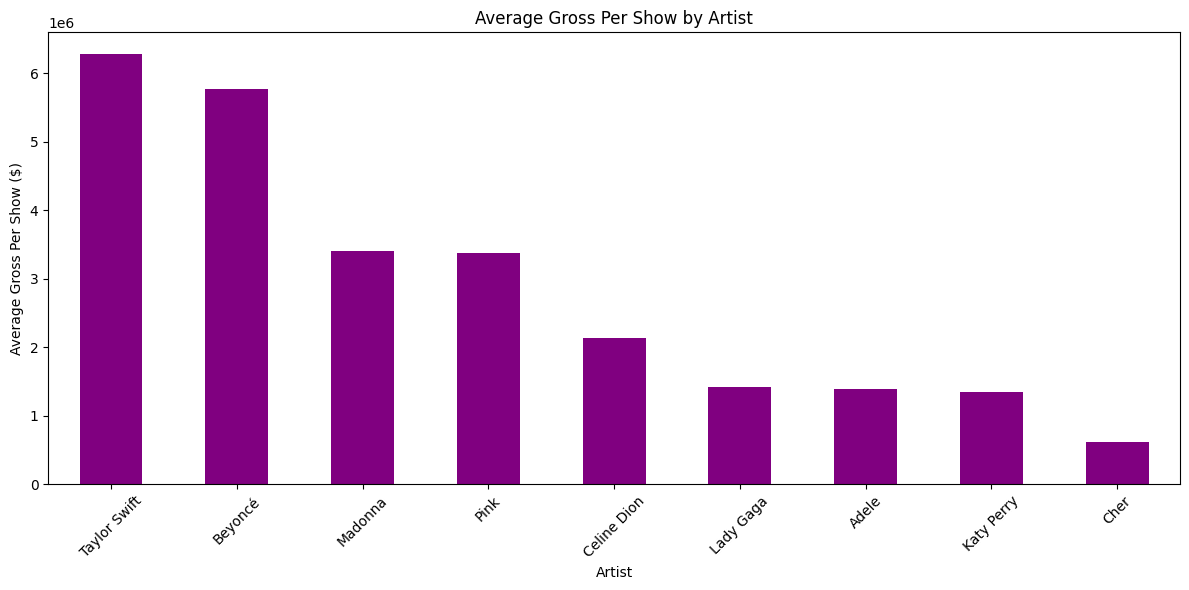

In [49]:
#Average gross per show 
# Add a new column for average gross per show
DatasetB['Gross per Show'] = DatasetB['Actual gross'] / DatasetB['Shows']
artist_avg_gross = DatasetB.groupby("Artist")['Gross per Show'].mean().sort_values(ascending=False)

# Plot average gross per show
plt.figure(figsize=(12, 6))
artist_avg_gross.plot(kind="bar", color="purple")
plt.title("Average Gross Per Show by Artist")
plt.ylabel("Average Gross Per Show ($)")
plt.xlabel("Artist")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Tours by Adjusted Gross:
         Artist                   Tour title  Adjusted gross
0  Taylor Swift              The Eras Tour †       780000000
1       Beyoncé       Renaissance World Tour       579800000
2       Madonna        Sticky & Sweet Tour ‡       560622615
3          Pink  Beautiful Trauma World Tour       454751555
4  Taylor Swift      Reputation Stadium Tour       402844849


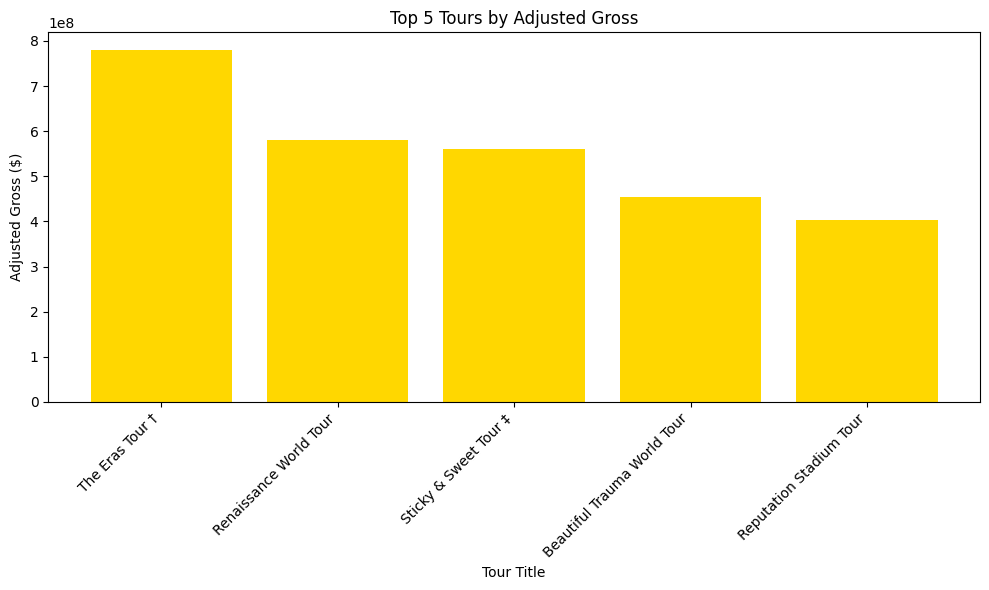

In [50]:
#Top Tours
top_tours = DatasetB.nlargest(5, "Adjusted gross")[["Artist", "Tour title", "Adjusted gross"]]
print("Top 5 Tours by Adjusted Gross:")
print(top_tours)

# Bar plot for top tours
plt.figure(figsize=(10, 6))
plt.bar(top_tours["Tour title"], top_tours["Adjusted gross"], color="gold")
plt.title("Top 5 Tours by Adjusted Gross")
plt.xlabel("Tour Title")
plt.ylabel("Adjusted Gross ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
